# Decision Tree

No.	Walks an hour	Eats Vegan	Sleeps 8 Hours	No Junk	Risk of Heart Disease
0	TRUE	TRUE	TRUE	TRUE	No \
1	TRUE	TRUE	TRUE	TRUE	No \
2	TRUE	FALSE	TRUE	FALSE	Yes \
3	FALSE	TRUE	TRUE	TRUE	No \
4	TRUE	TRUE	TRUE	TRUE	No \
5	TRUE	TRUE	TRUE	TRUE	No \
6	TRUE	FALSE	FALSE	FALSE	Yes \
7	TRUE	FALSE	TRUE	FALSE	Yes \
8	TRUE	TRUE	TRUE	TRUE	No \
9	FALSE	FALSE	TRUE	TRUE	Yes \

In [19]:
import pandas as pd
disease_df =pd.read_csv("/content/drive/MyDrive/CIS 710/Labs/heartdisease.csv", header=0,index_col=0)
disease_df

,Walks an hour,Eats Vegan,Sleeps 8 Hours,No Junk,Risk of Heart Disease
No.,,,,,
0,True,True,True,True,No
1,True,True,True,True,No
2,True,False,True,False,Yes
3,False,True,True,True,No
4,True,True,True,True,No
5,True,True,True,True,No
6,True,False,False,False,Yes
7,True,False,True,False,Yes
8,True,True,True,True,No


In [34]:
X = disease_df.loc[:, disease_df.columns != 'Risk of Heart Disease']
Y = disease_df.loc[:, disease_df.columns == 'Risk of Heart Disease']

In [35]:
X

,Walks an hour,Eats Vegan,Sleeps 8 Hours,No Junk
No.,,,,
0,True,True,True,True
1,True,True,True,True
2,True,False,True,False
3,False,True,True,True
4,True,True,True,True
5,True,True,True,True
6,True,False,False,False
7,True,False,True,False
8,True,True,True,True


In [36]:
Y

,Risk of Heart Disease
No.,
0,No
1,No
2,Yes
3,No
4,No
5,No
6,Yes
7,Yes
8,No


In [38]:
disease_map = {'Yes' : 1, 'No' : 0}
Y['Risk of Heart Disease'] = Y['Risk of Heart Disease'].map(disease_map)
Y

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Risk of Heart Disease
No.,
0,0
1,0
2,1
3,0
4,0
5,0
6,1
7,1
8,0


In [66]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_text
decision_tree = DecisionTreeClassifier(criterion = "entropy",random_state=0, max_depth=8)
decision_tree = decision_tree.fit(X, Y)
r = export_text(decision_tree, feature_names=['Walks an hour',	'Sleeps 8 Hours',	'No Junk'])
print(r)

|--- No Junk <= 0.50
|   |--- class: 1
|--- No Junk >  0.50
|   |--- Walks an hour <= 0.50
|   |   |--- class: 0
|   |--- Walks an hour >  0.50
|   |   |--- class: 0



In [69]:
clf = tree.DecisionTreeClassifier(criterion = "entropy")
clf = clf.fit(X, Y)

[Text(0.4, 0.8333333333333334, 'X[2] <= 0.5\nentropy = 0.971\nsamples = 10\nvalue = [6, 4]'),
 Text(0.2, 0.5, 'entropy = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(0.6, 0.5, 'X[0] <= 0.5\nentropy = 0.592\nsamples = 7\nvalue = [6, 1]'),
 Text(0.4, 0.16666666666666666, 'entropy = 1.0\nsamples = 2\nvalue = [1, 1]'),
 Text(0.8, 0.16666666666666666, 'entropy = 0.0\nsamples = 5\nvalue = [5, 0]')]

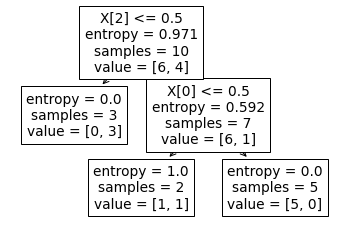

In [70]:
tree.plot_tree(clf) 

In [71]:
X = disease_df.loc[:, disease_df.columns != 'Eats Vegan']
X = X.loc[:, X.columns != 'Risk of Heart Disease']

In [72]:
X

,Walks an hour,Sleeps 8 Hours,No Junk
No.,,,
0,True,True,True
1,True,True,True
2,True,True,False
3,False,True,True
4,True,True,True
5,True,True,True
6,True,False,False
7,True,True,False
8,True,True,True


In [73]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, Y)

[Text(0.4, 0.8333333333333334, 'X[2] <= 0.5\ngini = 0.48\nsamples = 10\nvalue = [6, 4]'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(0.6, 0.5, 'X[0] <= 0.5\ngini = 0.245\nsamples = 7\nvalue = [6, 1]'),
 Text(0.4, 0.16666666666666666, 'gini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.8, 0.16666666666666666, 'gini = 0.0\nsamples = 5\nvalue = [5, 0]')]

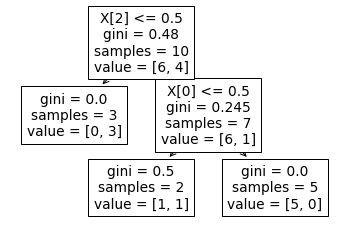

In [74]:
tree.plot_tree(clf)

[Text(0.4, 0.8333333333333334, 'No Junk <= 0.5\ngini = 0.48\nsamples = 10\nvalue = [6, 4]'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(0.6, 0.5, 'Walks an hour <= 0.5\ngini = 0.245\nsamples = 7\nvalue = [6, 1]'),
 Text(0.4, 0.16666666666666666, 'gini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.8, 0.16666666666666666, 'gini = 0.0\nsamples = 5\nvalue = [5, 0]')]

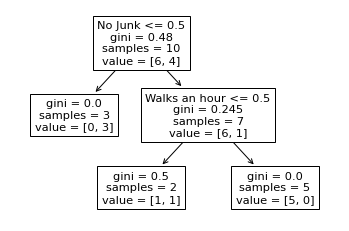

In [75]:
sklearn.tree.plot_tree(clf, max_depth=None, 
                       feature_names=['Walks an hour'	,'Sleeps 8 Hours'	,'No Junk'], 
                       class_names=None, label='all', 
                       filled=False, impurity=True, node_ids=False, 
                       proportion=False, rounded=False, precision=3, ax=None, fontsize=None)